# Проверочное задание.

### Дано:
Файл `deviation.json`, содержащий в себе pandas json, представляющий из себя массив данных с отклонениями (в градусах) углов пола и потолка относительно ground truth (истинно известной информации), а также количество углов в комнатах (ground truth и подсчитываемых моделью).

### Необходимо:
Создать осмысленную статистику того, насколько хорошо данная модель работает.

#### Вариант осуществления 2:
В этом варианте я напрямую использую экземпляр класса `Plotter` и метод `draw_plot`.

In [1]:
from classes import Plotter

In [2]:
url: str = 'deviation.json'

# Creating Plotter class instance.
myplot = Plotter(url)

# Let`s print the top 5 rows to ensure everything is ok.
myplot.df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


**Первым делом,** хочется убедиться в том, что расчетное количество углов в комнатах совпадает с ground truth значениями.

In [3]:
len(myplot.df[myplot.df['gt_corners'] != myplot.df['rb_corners']])

0

#### Plot 1

Проверим, как ведут себя минимальные и максимальные отклонения.

Для этого отсортируем матрицу по возрастанию средних отклонений пола и потолка и выведем график.

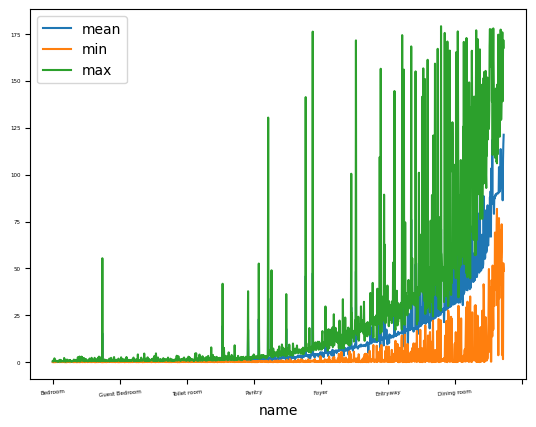

'./plots/plot_20230822185834_954.png'

In [4]:
myplot.df = myplot.df.sort_values(by=['floor_mean', 'ceiling_mean'])

myplot.draw_plot('name', ['mean', 'min', 'max'], kind='line', rot=5, fontsize=4)

Хорошо видна аномально большая разница (всплески) между минимальными и максимальными значениями замеров в некоторых комнатах. Возможны неточности измерений или ошибка.

#### Plot 2

Взглянем на **диаграмму рассеяния** среднего отклонения пола и среднего отклонения потолка.

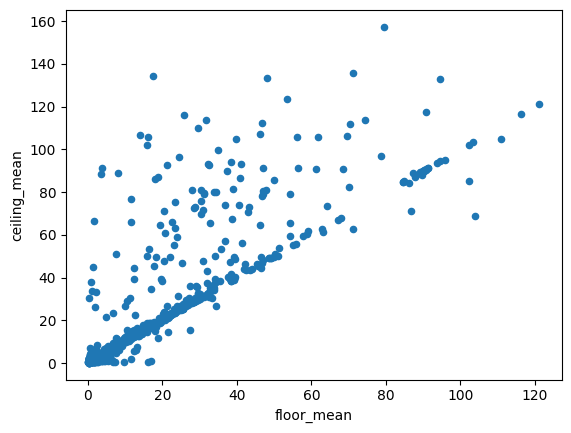

'./plots/plot_20230822185834_836.png'

In [5]:
myplot.draw_plot('floor_mean', 'ceiling_mean', kind='scatter')

Видно, что большинство значений коррелируют между собой, однако некоторые значения отклонений явно значительно выбиваются из общей массы, имея средние значения отклонений потолка более чем в 2 раза превышающие аналогичные значения для пола. Это вполне можно объяснить, например, тем фактом, что комната может иметь не прямой потолок, однако стоит внимания.

#### Plot 3, 4

Рассмотрим **диаграммы рассеяния** минимальных и максимальных отклонений пола и потолка.

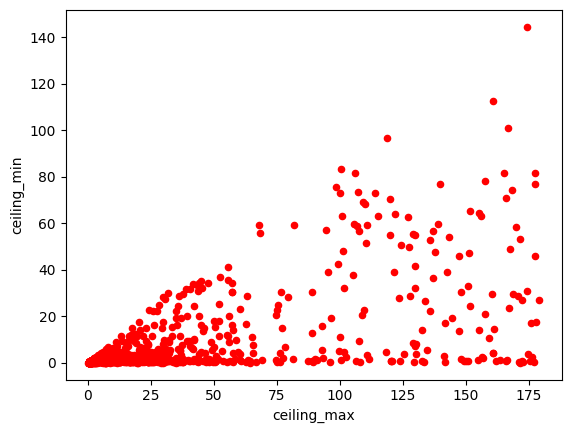

'./plots/plot_20230822185835_39.png'

In [6]:
myplot.draw_plot('ceiling_max', 'ceiling_min', kind='scatter', color='red')

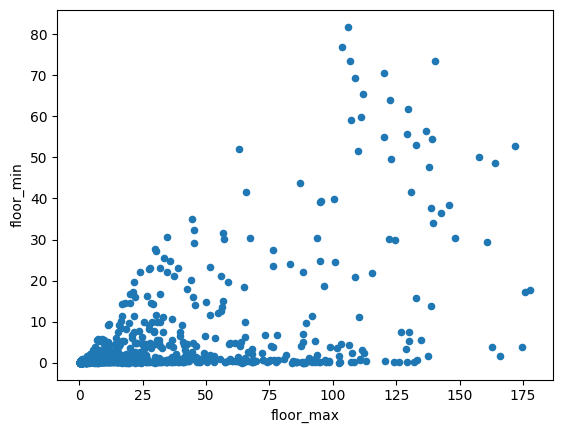

'./plots/plot_20230822185835_693.png'

In [7]:
myplot.draw_plot('floor_max', 'floor_min', kind='scatter')

Тут также видно, что, **несмотря на то**, что основная масса результатов находится в левом нижнем углу графиков *(что говорит как о небольшом отклонении от ground truth, так и о небольшой разнице между максимальным и минимальным значением)*:
- довольно большое количество результатов скопилось по линии вдоль оси Х, что говорит о большой разнице между минимальным и максимальным значением,
- некоторые результаты довольно хаотично разбросаны по графику.

#### Plot 5

Наконец, рассмотрим график распределения среднего отклонения пола относительно ground truth.

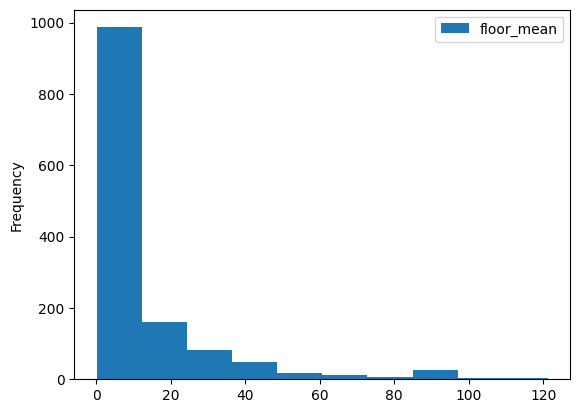

'./plots/plot_20230822185835_52.png'

In [8]:
myplot.draw_plot(y='floor_mean', kind='hist')

На гистограмме хорошо видно, что абсолютное большинство комнат имеет среднее отклонение меньше 10 градусов. Однако наблюдается аномальный всплеск на значениях от 80 до 100 градусов. Данные связанные с этими комнатами требуют проверки.